# INFO 370 Lab 8
*Name: Brian Park*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Different models in sklearn

1. Load data. Ensure it looks good. You need diagnosis and the features radius.worst and texture.worst, you don’t need anything else. Now it is time to create a model to analyze the relationship between cell nuclei and the diagnosis. We use sklearn in this lab. Sklearn needs the label vector y and the design matrix X for fitting the model. These can be series, data frames, or numpy arrays.
2. Extract the diagnosis vector. This is your outcome vector y. Hint: for color consistency below, it is better to convert it to a binary vector where “1” (or “true”) corresponds to cancer.
3. Extract features “readius.worst” and “texture.worst” from data. This is the design matrix X.
4. Create a sklearn logistic regression object using LogisticRegression
5. Fit your object using X and y.
6. Predict the category–cancer/no cancer–using your model.
7. Print the accuracy of your predictions.
8. Make the decision boundary plot of your results.
9. Now repeat steps 4-8, but this time use nearest neighbors (a single neighbor)
10. Repeat with 5-NN
11. And repeat with decision trees.
12. If you did it correctly, you noticed that 1-NN gave you the best accuracy. Why is it so? Do you think this indicates that 1-NN is the best approach here?

In [2]:
#1-1
wdbc = pd.read_csv("../data/wdbc.csv.bz2", usecols=["diagnosis", 
                                                    "radius.worst", 
                                                    "texture.worst"])
wdbc.head()

,diagnosis,radius.worst,texture.worst
0,M,25.38,17.33
1,M,24.99,23.41
2,M,23.57,25.53
3,M,14.91,26.50
4,M,22.54,16.67


In [3]:
#1-1
wdbc.shape

(569, 3)

In [4]:
#1-1
wdbc.isna().sum()

diagnosis        0
radius.worst     0
texture.worst    0
dtype: int64

In [5]:
#1-2
wdbc["D"] = np.where(wdbc.diagnosis == "M", 1, 0)
y = wdbc.D.values == 1

In [6]:
#1-3
X = wdbc[["radius.worst", "texture.worst"]].values
X[:5]

array([[25.38, 17.33],
       [24.99, 23.41],
       [23.57, 25.53],
       [14.91, 26.5 ],
       [22.54, 16.67]])

In [7]:
#1-4
from sklearn.linear_model import LogisticRegression

m = LogisticRegression()

In [8]:
#1-5
_ = m.fit(X, y)

In [9]:
#1-6
yhat = m.predict(X)

In [10]:
#1-7
np.mean(yhat == y)

0.945518453427065

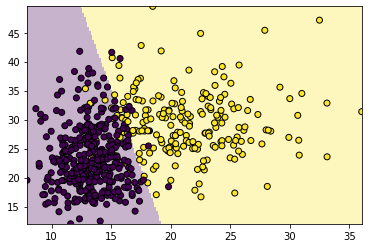

In [11]:
#1-8
def bplot(X):
    nGrid = 200
    x1 = X[:,0]
    x2 = X[:,1]
    ex1 = np.linspace(x1.min(), x1.max(), nGrid)
    ex2 = np.linspace(x2.min(), x2.max(), nGrid)
    xx1, xx2 = np.meshgrid(ex1, ex2)
    g = np.column_stack((xx1.ravel(), xx2.ravel()))
    # we create the design matrix by stacking the xx1, xx2
    # after unraveling those into columns
    # predict on the grid
    hatY = m.predict(g).reshape(nGrid, nGrid)
    # imshow wants a matrix, so we reshape the predicted
    # vector into one
    _ = plt.imshow(hatY,
    # note: hatY must be numeric (or logical)!
    extent=(x1.min(), x1.max(), x2.min(), x2.max()),
    aspect="auto", # let the image fit to screen
    interpolation='none',
    origin='lower',
    # you need to specify that the image begins from below,
    # not above, otherwise it will be flipped around
    alpha=0.3)
    return plt.scatter(x1, x2, c=y, edgecolor='k')

bplot(X)

In [12]:
#1-9
from sklearn.neighbors import KNeighborsClassifier

m = KNeighborsClassifier(1)
_ = m.fit(X, y)
yhat = m.predict(X)

np.mean(yhat == y)

1.0

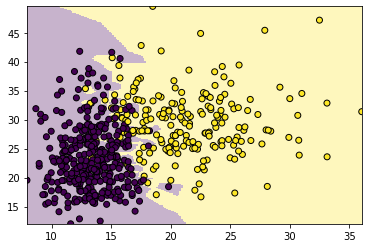

In [13]:
#1-9
bplot(X)

In [14]:
#1-10
m = KNeighborsClassifier(5)
_ = m.fit(X, y)
yhat = m.predict(X)

np.mean(yhat == y)

0.9490333919156415

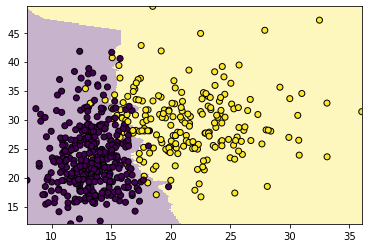

In [15]:
#1-10
bplot(X)

In [16]:
#1-11
from sklearn.tree import DecisionTreeClassifier

m = DecisionTreeClassifier(max_depth = 4)
_ = m.fit(X, y)
yhat = m.predict(X)

np.mean(yhat == y)

0.9578207381370826

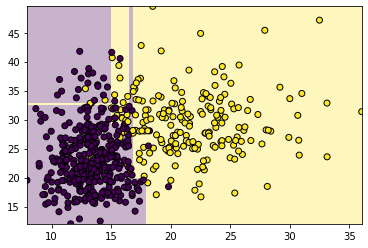

In [17]:
#1-11
bplot(X)

In [18]:
#1-12

1-NN is the best one because it has 100% accuracy showing the most accurate measurement.